# Name: Teng Siong (T.S) Yeap
# Lab 3

# Keras Neural Network

In [1]:
# assignment is done on Google Colab using GPU
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

1.13.1


Using TensorFlow backend.


In [0]:
#load dataset using keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
#The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9 (0 = T-shirt/top)
#Store class names for plotting the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Explore the data
print(train_images.shape) #in train, there are 60,000 images and the image size is 28 x 28 pixel
print(train_labels.shape) #60,000 labels
print(train_labels)       #a list of intergers in between 0-9
print(test_images.shape)  #in test, there are 10,000 images and the image size is 28 x 28 pixel
print(test_labels.shape)  #10,000 labels

(60000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
(10000,)


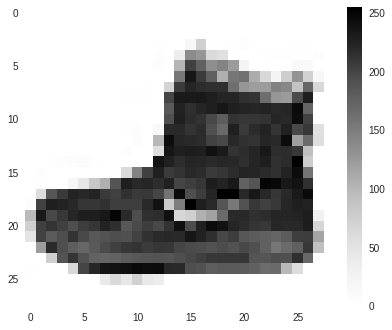

In [5]:
# Inspect first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

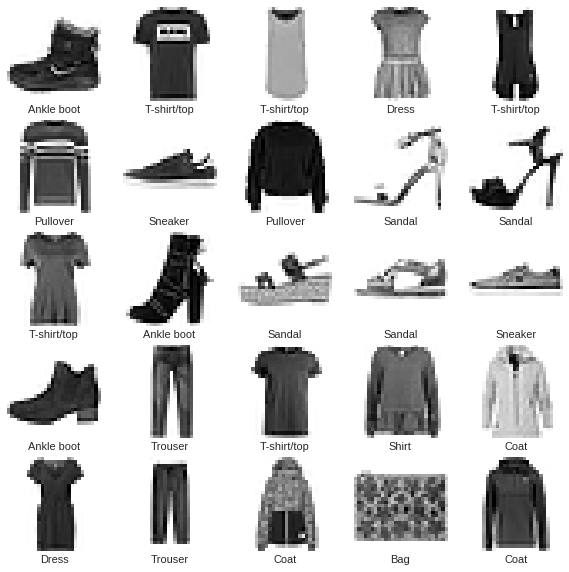

In [6]:
#Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#Preprocessing
#The first model/base model will be Keras Neural Network
#Require values from 0 - 1 as inputs
#So we will devide the values by 255 (which is the maximum RGB code minus the minimum RGB code)

#Making sure that the values are float so that we can get decimal points after division
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images /= 255
print('train_images shape:', train_images.shape)
print('Number of images in train_images', train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

train_images shape: (60000, 28, 28)
Number of images in train_images 60000
Number of images in test_images 10000


In [8]:
#Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#Train model
history  = model.fit(train_images, train_labels, epochs=50, 
                     batch_size=300, verbose=1, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.6097 - acc: 0.7965 - val_loss: 0.4890 - val_acc: 0.8274
Epoch 2/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4282 - acc: 0.8520 - val_loss: 0.4377 - val_acc: 0.8462
Epoch 3/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3900 - acc: 0.8646 - val_loss: 0.4223 - val_acc: 0.8503
Epoch 4/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3623 - acc: 0.8726 - val_loss: 0.4010 - val_acc: 0.8591
Epoch 5/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3434 - acc: 0.8788 - val_loss: 0.4104 - val_acc: 0.8533
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3311 - acc: 0.8830 - val_loss: 0.3793 - val_acc: 0.8673
Epoch 7/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3144 - acc: 0.8877 - val_loss: 0.

Keras Neural Network took 51.13s

In [11]:
# Evaluate the model
scores = model.evaluate(test_images, test_labels, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3497 - acc: 0.8940
Test accuracy: 0.894
Test loss: 0.3496749350875616


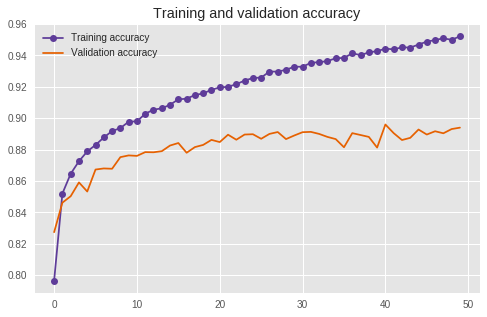

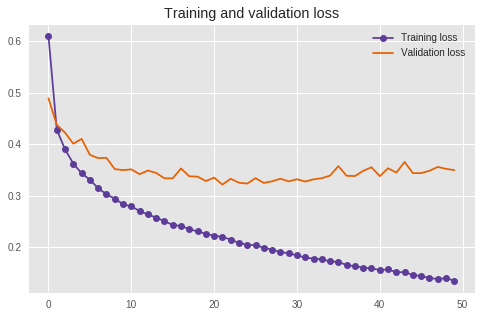

In [12]:
#Plot model performance
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

In [0]:
#Need to reshape the array to 2-dim for SVM
reshape_train_images = train_images.reshape(-1, 28 * 28)
reshape_test_images = test_images.reshape(-1, 28 * 28)

# SVM Model

In [14]:
#build svm model using linear SVC
svm.model = svm.LinearSVC()
svm.model.fit(reshape_train_images, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

SVM took 433.25s

In [15]:
#predict
svm_predict= svm.model.predict(reshape_test_images)
svm_acc = accuracy_score(test_labels, svm_predict)
print("Test accuracy: ", svm_acc)

Test accuracy:  0.8398


In [16]:
#confusion matrix
expected = test_labels
predicted = svm_predict
print(confusion_matrix(expected, predicted))

[[822   3  14  52   6   3  89   0  11   0]
 [  4 952   5  28   5   0   3   1   2   0]
 [ 29   4 727  13 137   0  80   0   9   1]
 [ 32  18  17 865  32   0  30   1   5   0]
 [  1   2 110  41 765   0  72   0   9   0]
 [  2   0   0   2   0 919   0  46  11  20]
 [158   3 137  45 102   0 530   0  25   0]
 [  0   0   0   0   0  33   0 935   1  31]
 [  9   1   8  11   4   7  16   6 937   1]
 [  0   1   0   0   0  14   1  38   0 946]]


#Random Forest

In [17]:
#build random forrest model
rf_model = RandomForestClassifier().fit(reshape_train_images, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF took 12.09s

In [19]:
#predict
rf_predict= rf_model.predict(reshape_test_images)
rf_acc = accuracy_score(test_labels, rf_predict)
print("Test accuracy: ", rf_acc)

Test accuracy:  0.8563


In [20]:
#confusion matrix
predicted = rf_predict
print(confusion_matrix(expected, predicted))

[[830   0  16  32   5   1 108   0   8   0]
 [  5 965   4  19   3   0   3   0   1   0]
 [ 20   1 775  11 124   0  60   0   9   0]
 [ 41   7  12 880  32   0  27   0   1   0]
 [  5   0 127  42 772   1  51   0   2   0]
 [  0   0   0   1   0 952   0  33   1  13]
 [171   1 126  34 105   0 545   0  18   0]
 [  0   0   0   0   0  25   0 937   0  38]
 [  6   2  10   4   2   1   6   5 962   2]
 [  0   0   0   0   0  14   0  38   3 945]]


# Questions:
__1. What is the accuracy of each model?__

In [22]:
#Accuracy for each model
print("The accuracy for Keras Neural Network:", test_acc)
print("The accuracy for SVM:", svm_acc)
print("The accuracy for Random Forrest:", rf_acc)

The accuracy for Keras Neural Network: 0.894
The accuracy for SVM: 0.8398
The accuracy for Random Forrest: 0.8563


__2. What are the trade-offs of each approach?__

Keras Neural Network has the best accuracy among the three models because it allows more than 2 dimensions as an input. On the other hand, SVM and Random Forrest only allow less and equal of 2 dimensions as an input. Thus, the accuracy is not as great.



__3. What is the compute performance of each approach?__

Keras Neural Network: 51.13

SVM: 433.25s

Random Forrest: 445.1s

Implementing TensorFlow and GPU does speed up the processing in Kera Neural Netowrk model.

## Reference
1. https://www.tensorflow.org/tutorials/keras/basic_classification
2. https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d